In [4]:
# Import tensorflow and load 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.preprocessing.image import ImageDataGenerator

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Group_Project_Data/Train', image_size=(64,64), batch_size=256)
train_dataset = train_dataset.map(lambda x,y: (x/255, y))

val_dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Group_Project_Data/Valid', image_size=(64,64), batch_size=256)
val_dataset = val_dataset.map(lambda x,y: (x/255, y))

# Unpack image/data and labels/targets
X_train, y_train = next(iter(train_dataset))
X_test, y_test = next(iter(val_dataset))

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


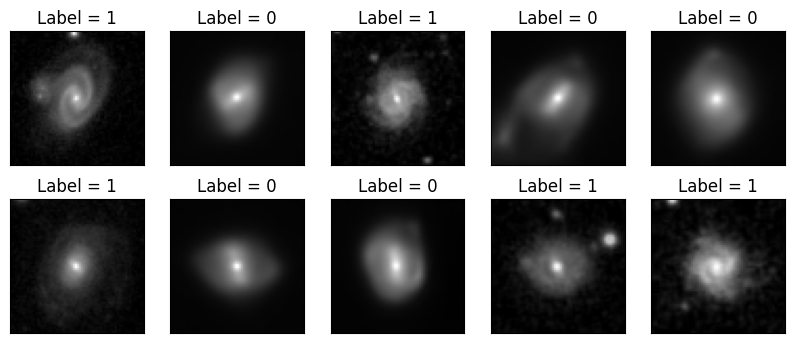

In [9]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5, figsize=(10, 4))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(X_train[i,:,:])
    ax[i].set_title(f'Label = {y_train[i]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

In [17]:
### Create the layers for the CNN model, using the Functional API
# Input, Conv2D, MaxPool2D, Flatten, Dense

from tensorflow.keras import layers, models

Inp = layers.Input((64,64,3), dtype='float32', name='Model_Input')
Conv1 = layers.Conv2D(32, (3,3), activation='relu',
                      padding='same', name='conv_1')(Inp)
Pool1 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_1')(Conv1)
Conv2 = layers.Conv2D(32, (3,3), activation='relu',
                      padding='same', name='conv_2')(Pool1)
Pool2 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_2')(Conv2)
Flat = layers.Flatten()(Pool2)
Dense1 = layers.Dense(64, activation='relu', name='fc_1')(Flat)
Dense2 = layers.Dense(10, name='fc_2')(Dense1)

In [18]:
### Create the model, using the input and output tensors you have define above.
### Display the model summary.
# models.Model

galaxy_model = models.Model(inputs=Inp, outputs=Dense2)
galaxy_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Model_Input (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 fc_1 (Dense)                (None, 64)                5243

In [19]:
### Compile the model with the Adam optimizer, Sparse Categorical Crossentropy
### loss (from_logits=True), and the accuracy metric
# optimizers.Adam, losses.SparseCategoricalCrossentropy
from tensorflow.keras import losses, optimizers

galaxy_model.compile(optimizer=optimizers.Adam(),
                    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [20]:
## Train the model for 25 epochs on the training images and labels
### Using the test images and labels as validation data

history = galaxy_model.fit(x=X_train, y=y_train, epochs=25,
                          validation_data=(X_test, y_test),
                          batch_size=512)

# Keys inside the history dictionary.
print(history.history.keys)

Epoch 1/25
1/1 [==============================] - 12s 12s/step - loss: 2.3472 - accuracy: 0.0000e+00 - val_loss: 2.1046 - val_accuracy: 0.4688
Epoch 2/25
1/1 [==============================] - 0s 72ms/step - loss: 2.0994 - accuracy: 0.4805 - val_loss: 1.8420 - val_accuracy: 0.4688
Epoch 3/25
1/1 [==============================] - 0s 67ms/step - loss: 1.8315 - accuracy: 0.4805 - val_loss: 1.5215 - val_accuracy: 0.4688
Epoch 4/25
1/1 [==============================] - 0s 64ms/step - loss: 1.5051 - accuracy: 0.4805 - val_loss: 1.2563 - val_accuracy: 0.4688
Epoch 5/25
1/1 [==============================] - 0s 71ms/step - loss: 1.2351 - accuracy: 0.4805 - val_loss: 1.0372 - val_accuracy: 0.4688
Epoch 6/25
1/1 [==============================] - 0s 68ms/step - loss: 1.0186 - accuracy: 0.4805 - val_loss: 0.7865 - val_accuracy: 0.4688
Epoch 7/25
1/1 [==============================] - 0s 66ms/step - loss: 0.7751 - accuracy: 0.4805 - val_loss: 0.5900 - val_accuracy: 0.9453
Epoch 8/25
1/1 [=======

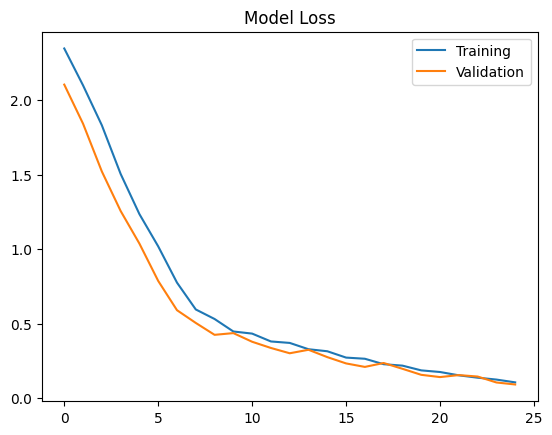

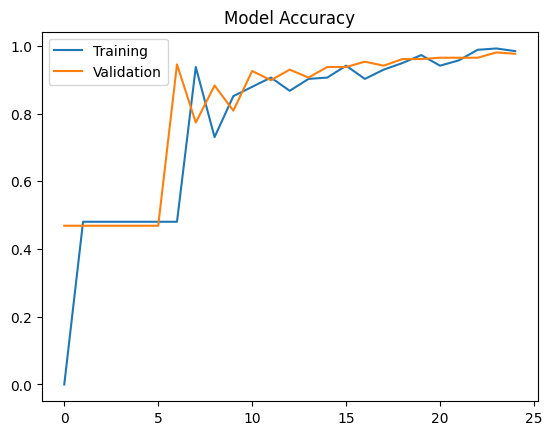

In [21]:
### Plot the losses and metrics for the training and validation data.
### These values are stored inside the history.history dictionary object.
### You should make two plots, one for the losses, and one for the metrics.

plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()